In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential  
from keras.layers import Dense, LSTM, Dropout 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# plot open vs date (training)
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&outputsize=full&apikey=WIGVQ9248GZG5TU3&datatype=csv'

In [4]:
full = pd.read_csv(url)
full.head()
full.shape

(5033, 9)

In [5]:
train = full.head(int(full.shape[0]*0.7))
test = full.tail(int(full.shape[0]*0.3))

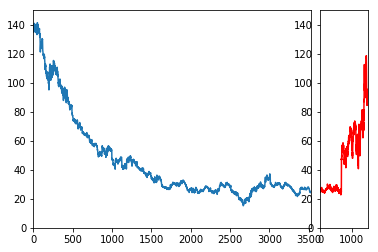

In [6]:
fg1 = plt.subplot2grid((1,6),(0,0), rowspan=1, colspan=5)
fg2 = plt.subplot2grid((1,6),(0,5), rowspan=1, colspan=1)

fg1.plot(train['open'].values)
fg1.set_xlim([0,train.shape[0]])
fg1.set_ylim([0,150])

fg2.plot(test['open'].values,color='red')
fg2.set_xlim([0,test.shape[0]])
fg2.set_ylim([0,150])

plt.show()

In [7]:
# training_complete = train
# training_processed = pd.DataFrame(training_complete.iloc[:, 0:2].values,columns=['Date','Open'])
# training_processed = training_processed.set_index('Date')
# training_processed.head()

In [8]:
train_processed = train.iloc[:, 1:2].values
test_processed = test.iloc[:, 1:2].values
print(train_processed.shape,test_processed.shape)

(3523, 1) (1509, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train_processed)
test_scaled = scaler.fit_transform(test_processed)

In [21]:
print("Train\n",train_scaled,"\n---------------\nTest")
print(test_scaled)

Train
 [[0.98907363]
 [0.97616785]
 [0.96801267]
 ...
 [0.07505938]
 [0.07529691]
 [0.07212985]] 
---------------
Test
[[0.01763749]
 [0.01930534]
 [0.02034566]
 ...
 [0.7094296 ]
 [0.72115665]
 [0.74200475]]


0.9699129057798892

In [22]:
features_set = []  
labels = []
for i in range(60, train_scaled.shape[0]):  
    features_set.append(train_scaled[i-60:i,0])
    labels.append(train_scaled[i,0])

features_set, labels = np.array(features_set), np.array(labels)  

features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  

In [23]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  
model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

model.add(Dense(units = 1))  

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
model.fit(features_set, labels, epochs = 10, batch_size = 32) 
model.summary()

Epoch 1/10
3463/3463 [==============================] - 34s - loss: 0.0014    
Epoch 2/10
3463/3463 [==============================] - 31s - loss: 0.0014    
Epoch 3/10
3463/3463 [==============================] - 30s - loss: 0.0010    
Epoch 4/10
3463/3463 [==============================] - 29s - loss: 9.1125e-04    
Epoch 5/10
3463/3463 [==============================] - 29s - loss: 8.9705e-04    
Epoch 6/10
3463/3463 [==============================] - 30s - loss: 8.3812e-04    
Epoch 7/10
3463/3463 [==============================] - 30s - loss: 7.9128e-04    
Epoch 8/10
3463/3463 [==============================] - 30s - loss: 9.9928e-04    
Epoch 9/10
3463/3463 [==============================] - 29s - loss: 7.6210e-04    
Epoch 10/10
3463/3463 [==============================] - 30s - loss: 7.6084e-04    
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)      

In [27]:
test_features = []  
for i in range(60, test_scaled.shape[0]):  
    test_features.append(test_scaled[i-60:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [31]:
predictions = model.predict(test_features)  
print("Test\n",test_scaled,"\n---------------\nPredict")
print(predictions)

Test
 [[0.01763749]
 [0.01930534]
 [0.02034566]
 ...
 [0.7094296 ]
 [0.72115665]
 [0.74200475]] 
---------------
Predict
[[0.05299412]
 [0.05234506]
 [0.05180435]
 ...
 [0.7219447 ]
 [0.72105503]
 [0.7200476 ]]


In [32]:
scaler.inverse_transform(predictions) 

array([[27.901833],
       [27.839565],
       [27.787695],
       ...,
       [92.0756  ],
       [91.99025 ],
       [91.89361 ]], dtype=float32)

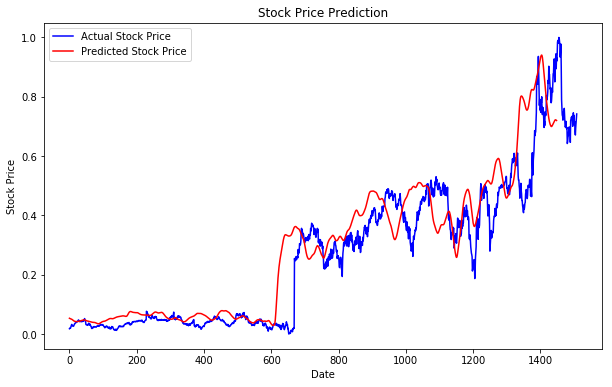

In [33]:
plt.figure(figsize=(10,6))  
plt.plot(test_scaled, color='blue', label='Actual Stock Price')  
plt.plot(predictions, color='red', label='Predicted Stock Price')  
plt.title('Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Stock Price')  
plt.legend()  
plt.show()